/tmp/ipykernel_23514/3617237575.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image=nib.load(img_path).get_data()


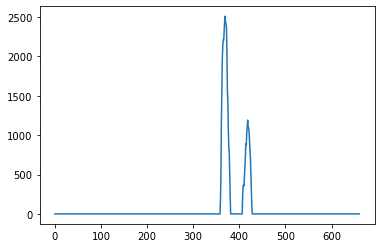

In [2]:

import nibabel as nib
img_path = "data/abd_lymph_node1/ABD_LYMPH_001_mask.nii.gz"

test_image=nib.load(img_path).get_data()
# test_image *= 255
# test_image = (test_image - np.min(test_image)) / (np.max(test_image) - np.min(test_image))
test_sum = np.sum(test_image, axis=(0, 1))
plt.plot(test_sum)

369


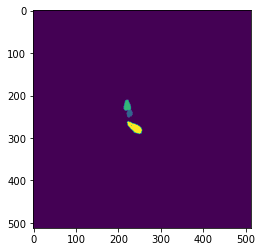

In [3]:
print(np.argmax(test_sum))
plt.imshow(test_image[:, :, 369])

In [20]:
# dicom_array_normalized = 255*(dicom_array - np.min(dicom_array)) / (np.max(dicom_array) - np.min(dicom_array))
# print(np.shape(dicom_array_normalized)[2])
# label_mask = 255*(test_image - np.min(test_image)) / (np.max(test_image) - np.min(test_image))
# dicom_array_normalized = dicom_array_normalized[:, :, 1:]
# print(np.shape(dicom_array_normalized))
# combined = np.concatenate((dicom_array_normalized, label_mask), axis=1)
# print(np.shape(combined))

(512, 512, 661)
(512, 1024, 661)


In [14]:
# from PIL import Image
# imgs = []

# for i in range(np.shape(dicom_array_normalized)[2]):
#     imgs.append(Image.fromarray(combined[:, :, i]))
# # imgs = [Image.fromarray(img) for img in imgs[]]
# print(np.shape(imgs[0]))
# # duration is the number of milliseconds between frames; this is 40 frames per second
# imgs[0].save("array.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)

(512, 1024)


In [35]:
import os 

og = "data_trial/ABD_LYMPH"
og = og + str("_004")
print(og)
step_one = os.listdir(og)
print(os.path.join(og, step_one[0]))
step_two = os.listdir(os.path.join(og, step_one[0]))
print(os.path.join(og, step_one[0], step_two[0]))
print(len(os.listdir(os.path.join(og, step_one[0], step_two[0]))))

data_trial/ABD_LYMPH_004
data_trial/ABD_LYMPH_004/09-14-2014-ABDLYMPH004-abdominallymphnodes-23531
data_trial/ABD_LYMPH_004/09-14-2014-ABDLYMPH004-abdominallymphnodes-23531/abdominallymphnodes-55124
736


In [14]:
#FUNCTION TO MAKE THE FILES EASIER TO ACCESS :")

source = "ordered_data/CT_Lymph_Nodes"
list_parents = os.listdir(source)
print(len(list_parents))

parent = os.path.join(source, str(list_parents[0]))
print(parent)
sub_parent = os.listdir(parent)
sub_parent = os.path.join(parent, str(sub_parent[0]))
print(sub_parent)
sub_sub_parent = os.listdir(sub_parent)
print(os.path.join(sub_parent, str(sub_sub_parent[0])))
print(len(os.listdir(os.path.join(sub_parent, str(sub_sub_parent[0])))))



82
ordered_data/CT_Lymph_Nodes/ABD_LYMPH_007
ordered_data/CT_Lymph_Nodes/ABD_LYMPH_007/09-14-2014-ABDLYMPH007-abdominallymphnodes-95788
ordered_data/CT_Lymph_Nodes/ABD_LYMPH_007/09-14-2014-ABDLYMPH007-abdominallymphnodes-95788/abdominallymphnodes-60969
747


In [ ]:
#preliminary moving the files code (only run once)
#RAN IT ONCE SO DON'T NEED TO DO IT AGAIN BUT HERE FOR REFERENCE


import shutil
source = "ordered_data/CT_Lymph_Nodes/remaining"

parent_folder_names = os.listdir(source)
print(len(os.listdir(source)))
destination_1 = "ordered_data/CT_Lymph_Nodes"

i = 0
for source_folders in parent_folder_names:
    source_folder = os.path.join(source, str(source_folders))
    destination = os.path.join(destination_1, source_folders)
    
    for child1_folder in os.listdir(source_folder):
        sub_child_folder = os.path.join(source_folder, child1_folder)
        destination2 = os.path.join(destination, str(child1_folder))
        if not os.path.exists(destination2):
                os.mkdir(destination2)

        for child2_folder in os.listdir(sub_child_folder):
            dest = os.path.join(destination2, child2_folder)
            last_step_source = os.path.join(sub_child_folder, child2_folder)
            print(dest)
            if not os.path.exists(dest):
                os.mkdir(dest)
            source_files = os.listdir(last_step_source)
            print(len(source_files))
            for files in source_files:
                final_source = os.path.join(last_step_source, str(files))
                final_dest = os.path.join(dest, str(files))
                shutil.move(final_source, final_dest)
        


In [ ]:
#ANOTHER BUG_FIX THAT I ALREADY RAN SO DON'T DO IT AGAIN

source = "ordered_data/CT_Lymph_Nodes/MED_LYMPH_063/09-14-2014-MEDLYMPH063-mediastinallymphnodes-96805/mediastinallymphnodes-24849/mediastinallymphnodes-24849"
dest = "ordered_data/CT_Lymph_Nodes/MED_LYMPH_063/09-14-2014-MEDLYMPH063-mediastinallymphnodes-96805/mediastinallymphnodes-24849"

import shutil
for files in os.listdir(source):
    source_file = os.path.join(source, str(files))
    dest_file = os.path.join(dest, str(files))

    shutil.move(source_file, dest_file)
    print("done")

In [ ]:
#ANOTHER RUN IT ONLY ONCE CODE BLOCK TO CREATE THE 3D ARRAY FROM 2D IMAGE SLICES OF DICOM

import pydicom as dicom
import numpy as np

source = "ordered_data/CT_Lymph_Nodes"
dest = "raw_data_arrays"
parent_folder_names = os.listdir(source)

#removing a defective folder with a defective dicom file
parent_folder_names.remove("MED_LYMPH_003")
parent_folder_names.remove("MED_LYMPH_063.npy")
print(len(parent_folder_names))
for source_folders in parent_folder_names:
    source_folder = os.path.join(source, str(source_folders))
    
    dest_array_path = os.path.join(dest, str(source_folders))

    #this step is to account for the fact that I already saved a bunch of the files in 3D arrays so
    #only want to run the followin code block if there doesn't already exist an array in that folder
    if len(os.listdir(dest_array_path)) == 0:
        dest_file_path = os.path.join(dest_array_path, str(np.char.lower(source_folders)))
        print(dest_array_path)
        if not os.path.exists(dest_array_path):
            os.mkdir(dest_array_path)

            
        for child1_folder in os.listdir(source_folder):
            grand_child_folder = os.path.join(source_folder, str(child1_folder))
            
            for great_grand_child_folder in os.listdir(grand_child_folder):
                last_step_source = os.path.join(grand_child_folder, str(great_grand_child_folder))
                # last_element = int(dicom_file.split("/")[-1].split("-")[-1].split(".")[0])

                empty_array = np.zeros((512, 512, len(os.listdir(last_step_source))))
                for dicom_files in os.listdir(last_step_source):
                    if dicom_files.endswith(".dcm"):
                        ds = dicom.dcmread(os.path.join(last_step_source, dicom_files))
                        last_element_dcm = dicom_files.split("-")
                        last_element_num = int(last_element_dcm[1].split(".")[0])
                        # print(last_element_num)
                        empty_array[:, :, last_element_num] = ds.pixel_array
                        # print(source_folder)
                print("saving the array")
                np.save(dest_file_path, empty_array)

0.6335
1.0


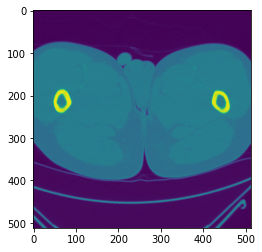

In [2]:
#function to convert the .nii files also into 3D arrays (segmentation maps) to be passed as labels
import numpy as np

dicom_folder = "raw_data_arrays/ABD_LYMPH_002/abd_lymph_002.npy"
#since each folder only contains one file we can just 0 index to get that specific file

dicom_array = np.load(dicom_folder)
dicom_array_normalized = (dicom_array - np.min(dicom_array)) / (np.max(dicom_array) - np.min(dicom_array))
#normalizing the dicom image to see what happens

print(np.max(dicom_array_normalized[:, :, 10]))
print(np.max(dicom_array_normalized))
plt.imshow(dicom_array_normalized[:, :, 10])


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

nii_folder = "MED_ABD_LYMPH_MASKS"
dest_mask_folder = "mask_folder(downsampled)"

for folders in os.listdir(nii_folder):
    nii_image_folder = os.path.join(nii_folder, str(folders))
    print(nii_image_folder)
    nii_image_file_path = os.path.join(nii_image_folder, str(os.listdir(nii_image_folder)[0]))
    nii_image_array = nib.load(nii_image_file_path).get_data()

    #downsampling to 128 x 128 x 128 despite the depth
    zoom_size = 128
    x_zoom = zoom_size / nii_image_array.shape[0]
    y_zoom = zoom_size / nii_image_array.shape[1]
    z_zoom = zoom_size / nii_image_array.shape[2]
    img = ndimage.zoom(nii_image_array, zoom=(x_zoom, y_zoom, z_zoom))

    dest_array_path = os.path.join(dest_mask_folder, str(folders))
    if not os.path.exists(dest_array_path + ".npy"):
        np.save(dest_array_path, img)
        

In [4]:
import scipy.ndimage as ndimage
import numpy as np
import pydicom as dicom

dest_path = "data(downsampled)"
source_parent_folder = "raw_data_arrays"

for dicom_folders in os.listdir(source_parent_folder):
    dicom_folders_path = os.path.join(source_parent_folder, dicom_folders)
    dicom_array = np.load(os.path.join(dicom_folders_path, os.listdir(dicom_folders_path)[0]))
    brother_file_is_here = os.path.join(dest_path, str(dicom_folders))

    if not os.path.exists(brother_file_is_here + ".npy"):
        print("here")
        img = dicom_array
        print(np.shape(dicom_array))
        zoom_size = 128
        x_zoom = zoom_size / img.shape[0]
        y_zoom = zoom_size / img.shape[1]
        z_zoom = zoom_size / img.shape[2]
        img = ndimage.zoom(img, zoom=(x_zoom, y_zoom, z_zoom))    
        print(brother_file_is_here + ".npy")
        np.save(os.path.join(dest_path, str(dicom_folders)), img)
    
# print(np.shape(img))
# plt.imshow(img[:, :, 21])